In [ ]:
import os
import sys
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pylab as plt

%pylab inline

!pip3 install -U git+https://github.com/PYFTS/pyFTS
from pyFTS.partitioners import Grid
from pyFTS.models import chen, cheng
from pyFTS.common import Util , Transformations
from pyFTS.benchmarks import Measures

In [2]:
from pyFTS.models import hofts
from pyFTS.common import Membership

In [4]:
data = pd.read_csv('/content/XOM.csv')

In [3]:
data_actual = pd.read_csv('/content/XOM.csv')

In [5]:
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

In [6]:
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [7]:
input_df = train_data[['Date', 'Close']]
input_df_test = test_data[['Date', 'Close']]
input_df_val = val_data[['Date', 'Close']]

In [8]:
input_actual = data_actual[['Date', 'Close']]

In [9]:
input_df = input_df.set_index('Date')
input_df_test = input_df_test.set_index('Date')
input_df_val = input_df_val.set_index('Date')

In [10]:
input_actual = data_actual.set_index('Date')

In [11]:
px.line(input_df, x=input_df.index, y="Close")

In [12]:
train_data = input_df.Close.values
test_data = input_df_test.Close.values
val_data = input_df_val.Close.values


tdiff = Transformations.Differential(1)
boxcox = Transformations.BoxCox(0)

In [13]:
data_actual = input_actual.Close.values

/usr/local/lib/python3.10/dist-packages/pyFTS/partitioners/partitioner.py:278: UserWarning:

FixedFormatter should only be used together with FixedLocator



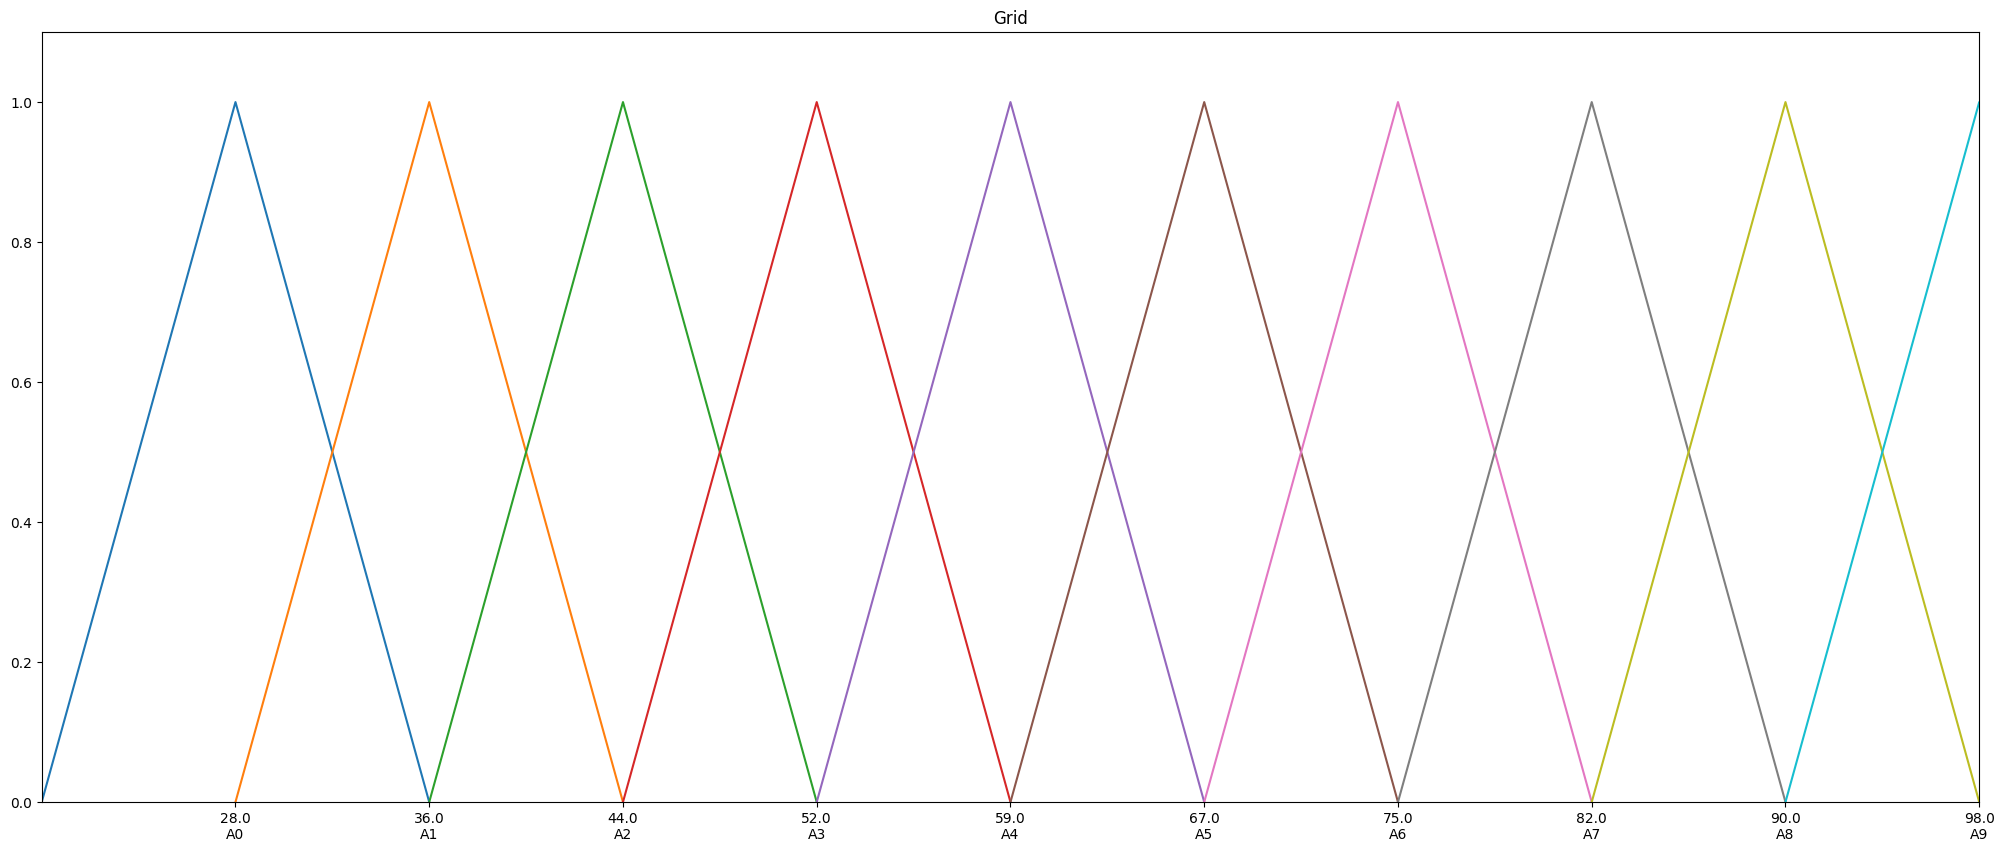

In [14]:
fs = Grid.GridPartitioner(data=train_data,npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[25,10])

fs.plot(ax)

In [15]:
# model = hofts.WeightedHighOrderFTS(partitioner=fs, order=1)
# model.fit(train_data)
# print(model)

model = cheng.TrendWeightedFTS(partitioner=fs)
model.fit(train_data)
# model.append_transformation(tdiff)
print(model)

Trend Weighted FTS:
A0 -> A1(0.333),A1(0.667)
A1 -> A0(0.0),A0(0.001),A1(0.001),A1(0.001),A1(0.002),A1(0.002),A1(0.002),A1(0.003),A1(0.003),A1(0.003),A1(0.004),A1(0.004),A1(0.004),A1(0.005),A1(0.005),A1(0.005),A1(0.006),A1(0.006),A1(0.006),A1(0.007),A1(0.007),A1(0.007),A1(0.008),A1(0.008),A1(0.008),A1(0.009),A1(0.009),A1(0.009),A1(0.01),A1(0.01),A1(0.01),A1(0.011),A1(0.011),A1(0.011),A1(0.012),A1(0.012),A1(0.012),A1(0.013),A1(0.013),A1(0.013),A1(0.014),A1(0.014),A1(0.014),A1(0.015),A1(0.015),A1(0.015),A1(0.016),A1(0.016),A1(0.016),A1(0.017),A1(0.017),A1(0.017),A1(0.018),A1(0.018),A1(0.018),A1(0.019),A1(0.019),A1(0.019),A1(0.02),A1(0.02),A1(0.02),A1(0.021),A1(0.021),A1(0.021),A1(0.022),A1(0.022),A1(0.022),A1(0.023),A1(0.023),A1(0.023),A1(0.024),A2(0.024),A2(0.024),A2(0.025),A2(0.025),A2(0.025),A2(0.026)
A2 -> A1(0.0),A1(0.0),A1(0.0),A1(0.0),A1(0.001),A1(0.001),A2(0.001),A2(0.001),A2(0.001),A2(0.001),A2(0.001),A2(0.001),A2(0.001),A2(0.001),A2(0.002),A2(0.002),A2(0.002),A2(0.002),A2(0.002

In [16]:
y_pred = model.predict(test_data)
# num_missing_values = len(test_data) - len(y_pred)
# y_pred = [y_pred[0]] * num_missing_values + y_pred

y_pred_val = model.predict(val_data)
# num_missing_values = len(val_data) - len(y_pred_val)
# y_pred_val = [y_pred_val[0]] * num_missing_values + y_pred_val


In [17]:
prediction = model.predict(data_actual)

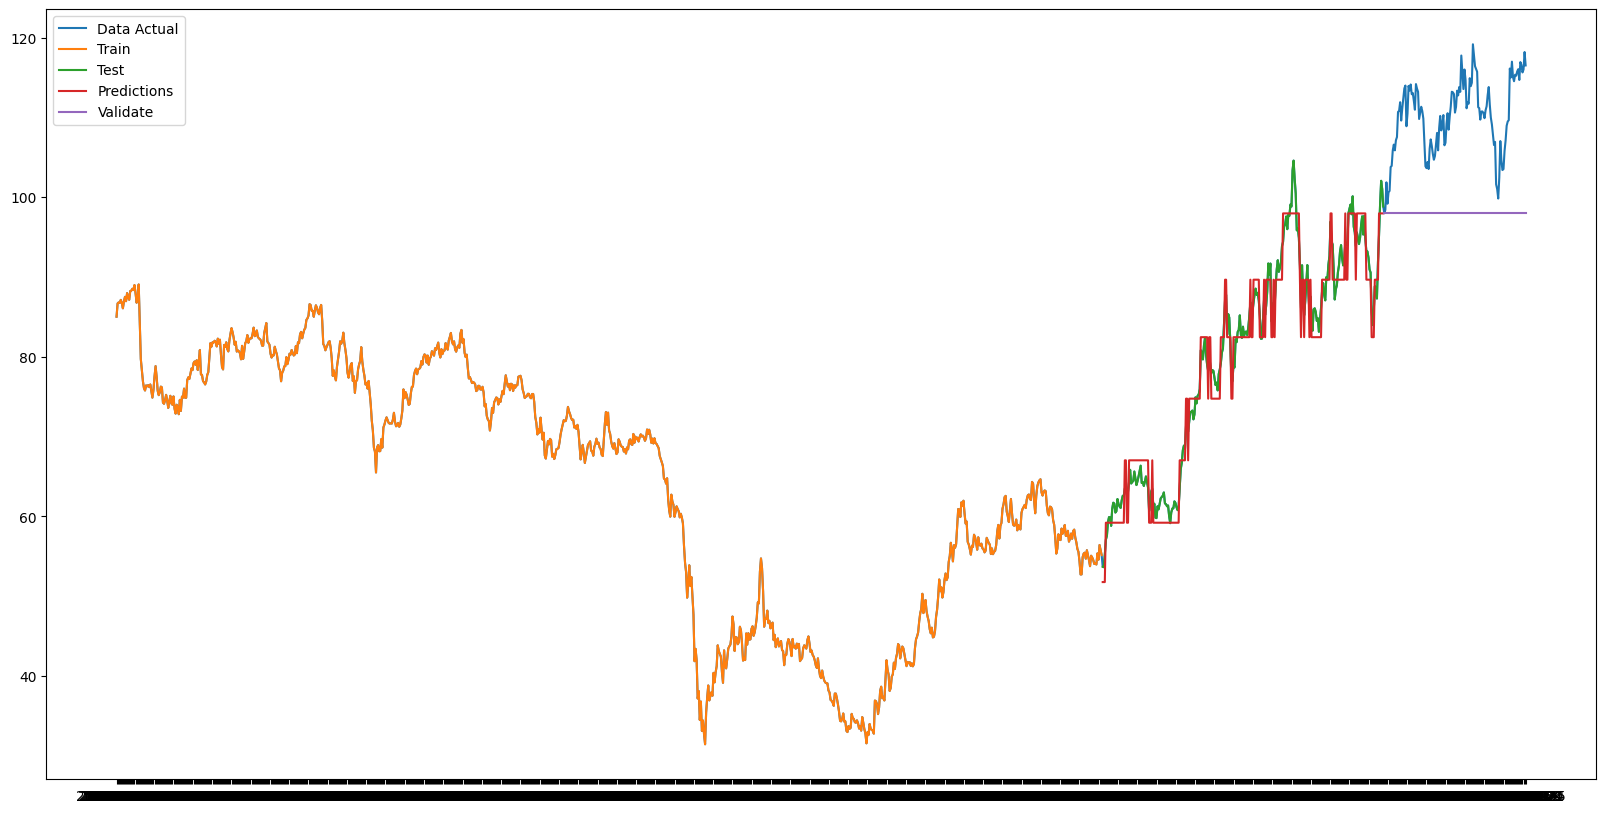

In [18]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(input_actual.index, data_actual)
plt.plot(input_df.index, train_data)
plt.plot(input_df_test.index, test_data)
plt.plot(input_df_test.index, y_pred)
plt.plot(input_df_val.index, y_pred_val)
plt.legend(['Data Actual','Train', 'Test', 'Predictions','Validate'])
plt.show()

# plt.plot(test_data.index, test_data['Close'])

# plt.plot(val_data.index, y_pred_val)
# plt.plot(last_data,y_next_30_days)

# plot(train_data)
# plot(test_data)
# plot(data_actual)
# plot(prediction)